In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
dataframe = pd.read_csv('totalfworkforce.csv')
display(dataframe.shape)
display(dataframe.columns)
display(dataframe)

(35, 7)

Index(['States\UTs', 'Cultivators', 'Agricultural Labour', 'Male Cultivators',
       'Male Agricultural Labour ', 'Female Cultivators',
       'Female Agricultural Labour '],
      dtype='object')

,States\UTs,Cultivators,Agricultural Labour,Male Cultivators,Male Agricultural Labour,Female Cultivators,Female Agricultural Labour
0,Jammu & Kashmir,1245316,547705,765527,414344,479789,133361
1,Himachal Pradesh,2062062,175038,906154,103060,1155908,71978
2,Punjab,1934511,1588455,1753359,1239445,181152,349010
3,Chandigarh,2578,1687,2114,1375,464,312
4,Uttarakhand,1580423,403301,735412,286540,845011,116761
5,Haryana,2480801,1528133,1789122,1041241,691679,486892
6,Delhi,33398,39475,27458,31352,5940,8123
7,Rajasthan,13618870,4939664,7518486,2132669,6100384,2806995
8,Uttar Pradesh,19057888,19939223,15511533,13803442,3546355,6135781
9,Bihar,7196226,18345649,5745420,12570717,1450806,5774932


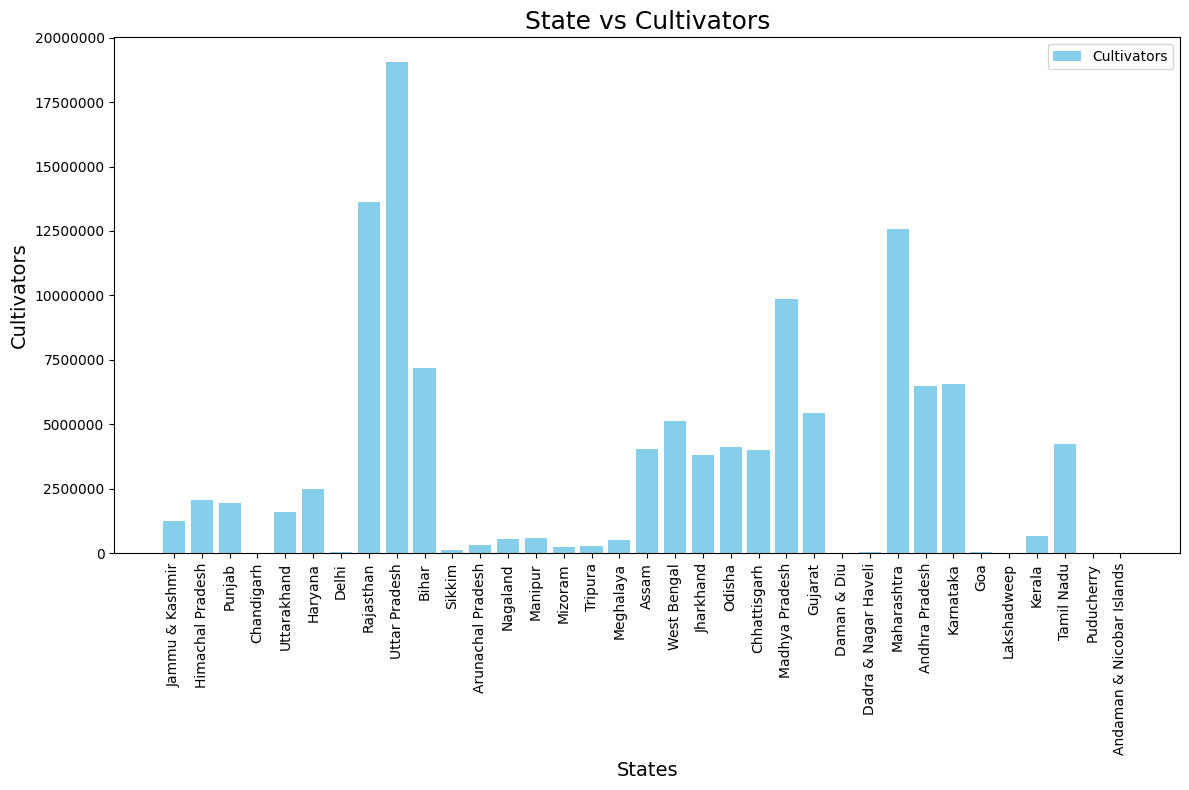

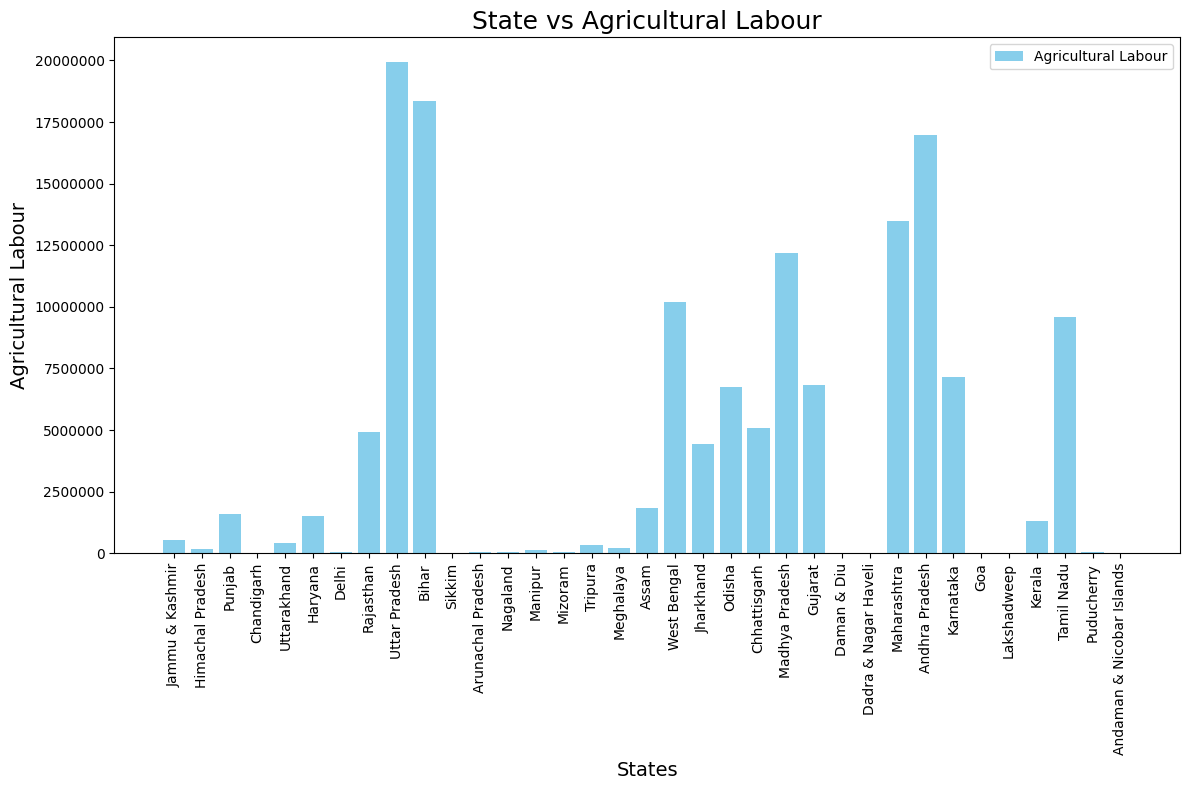

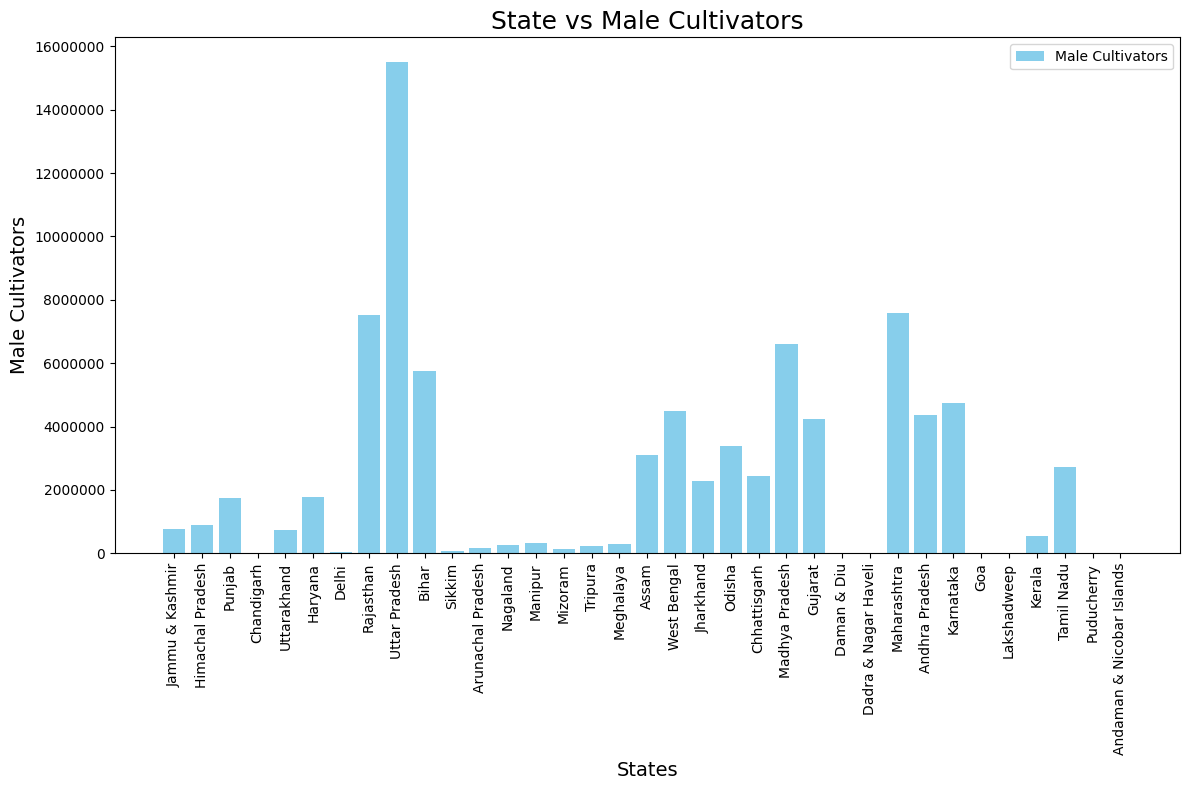

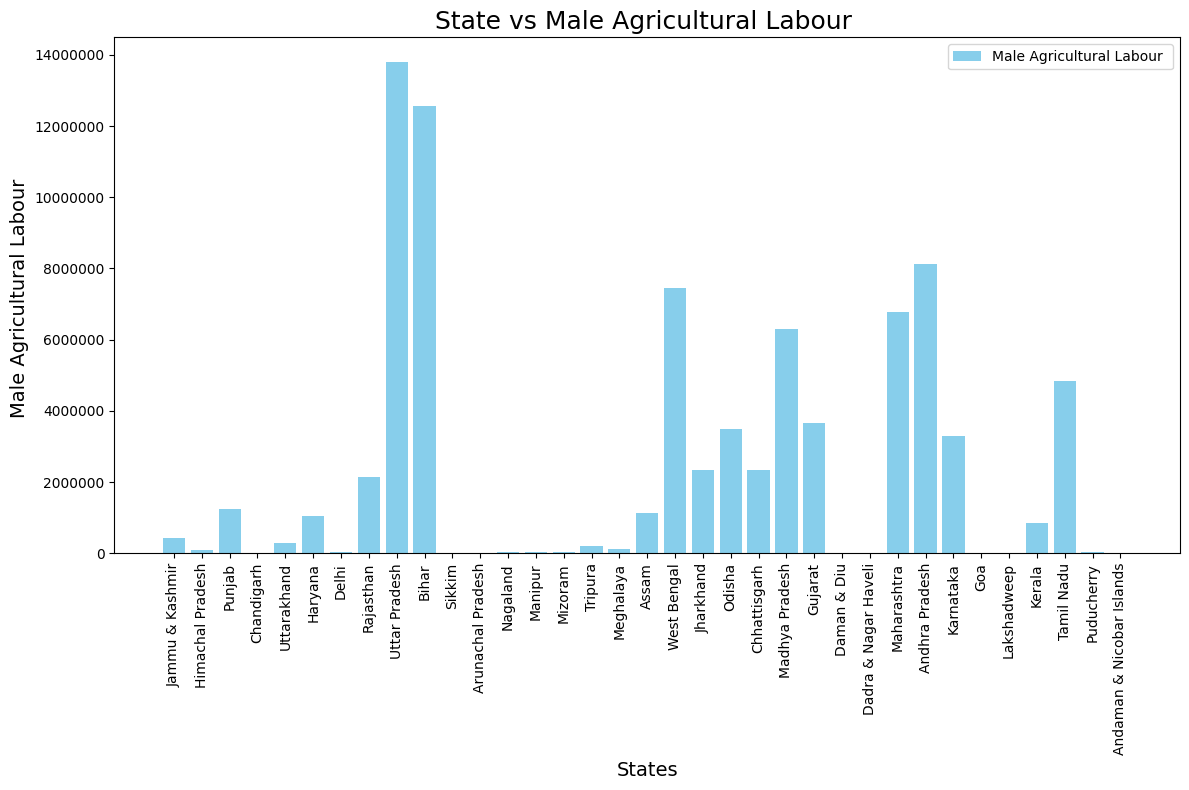

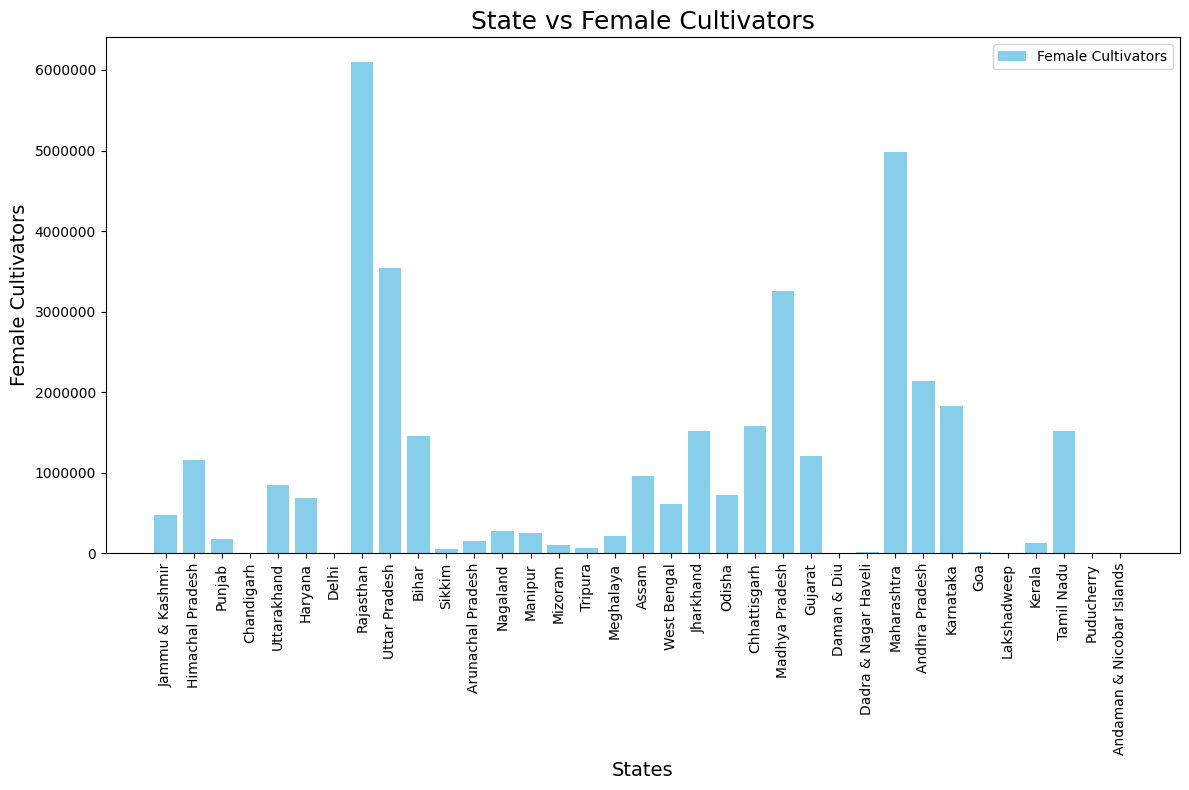

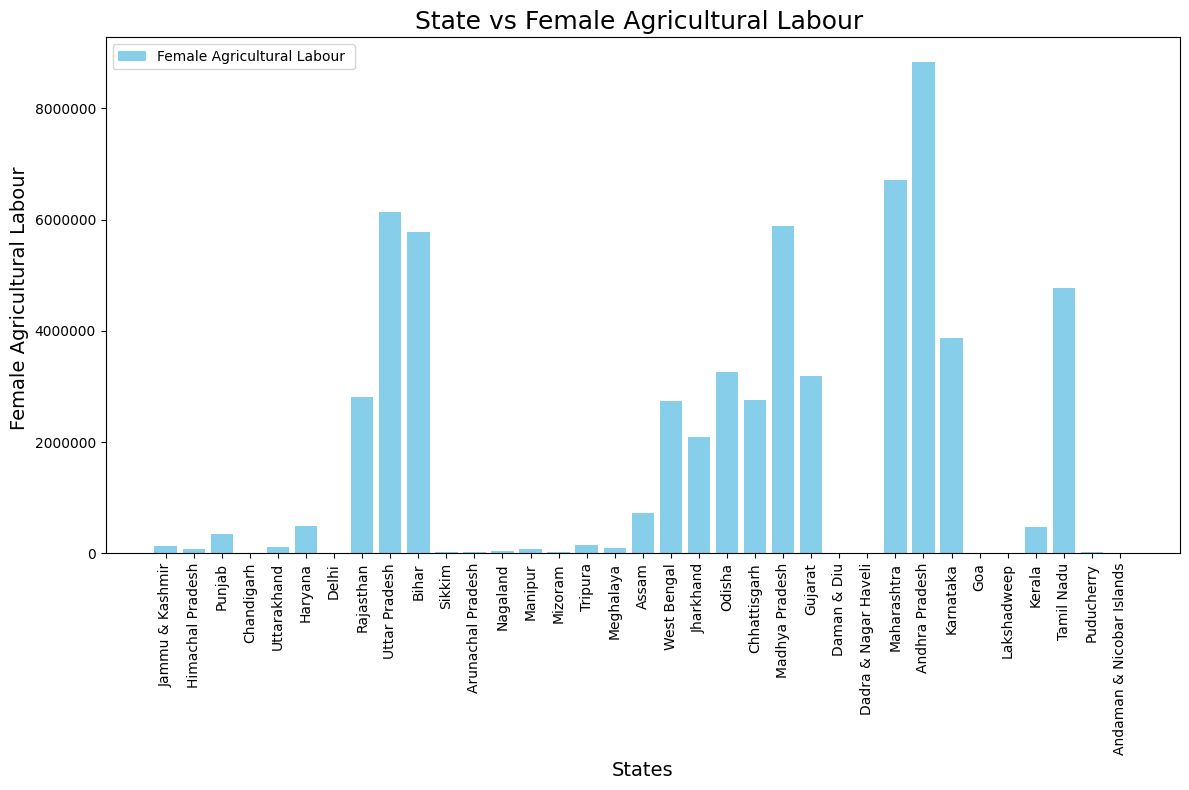

In [3]:
x = np.arange(len(dataframe))

for i in range(1, 7):
 
    plt.figure(figsize=(12, 8))
    plt.bar(x, dataframe.iloc[:, i], width=0.8, label=dataframe.columns[i], color='skyblue')
    plt.xlabel('States', fontsize=14)
    plt.ylabel(dataframe.columns[i], fontsize=14)
    plt.title(f'State vs {dataframe.columns[i]}', fontsize=18)
    plt.xticks(x, dataframe.iloc[:, 0], rotation=90)
    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()  

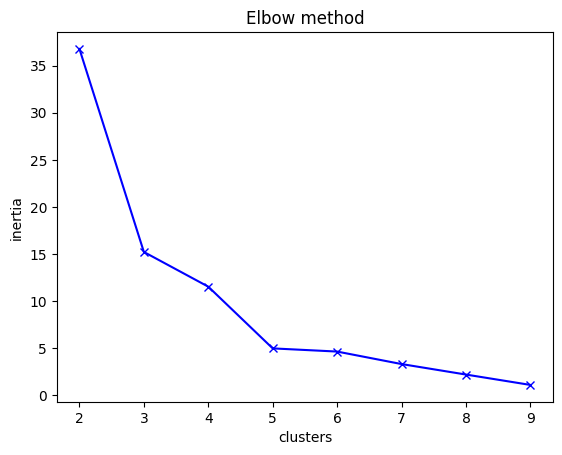

In [4]:
scaler = StandardScaler()
cultivators = dataframe[['Cultivators', 'Male Cultivators', 'Female Cultivators']]
scaled_features = scaler.fit_transform(cultivators)

k_range = range(2, 10)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.title("Elbow method")
plt.show()

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
cultivators['cluster'] = kmeans.fit_predict(scaled_features)
clusters_counts = cultivators['cluster'].value_counts()
sorted_clusters = clusters_counts.sort_index(ascending=True)
grouped = cultivators.groupby('cluster').sum()
clusters = pd.DataFrame(clusters_counts.sort_index(ascending=True))
display(clusters)
display(grouped)

C:\Users\jayesh\AppData\Local\Temp\ipykernel_19224\344215680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultivators['cluster'] = kmeans.fit_predict(scaled_features)


,count
cluster,
0,20
1,4
2,3
3,8


,Cultivators,Male Cultivators,Female Cultivators
cluster,,,
0,10171123,6236695,3934428
1,30112836,21447496,8665340
2,45246131,30622332,14623799
3,33278690,24456411,8822279


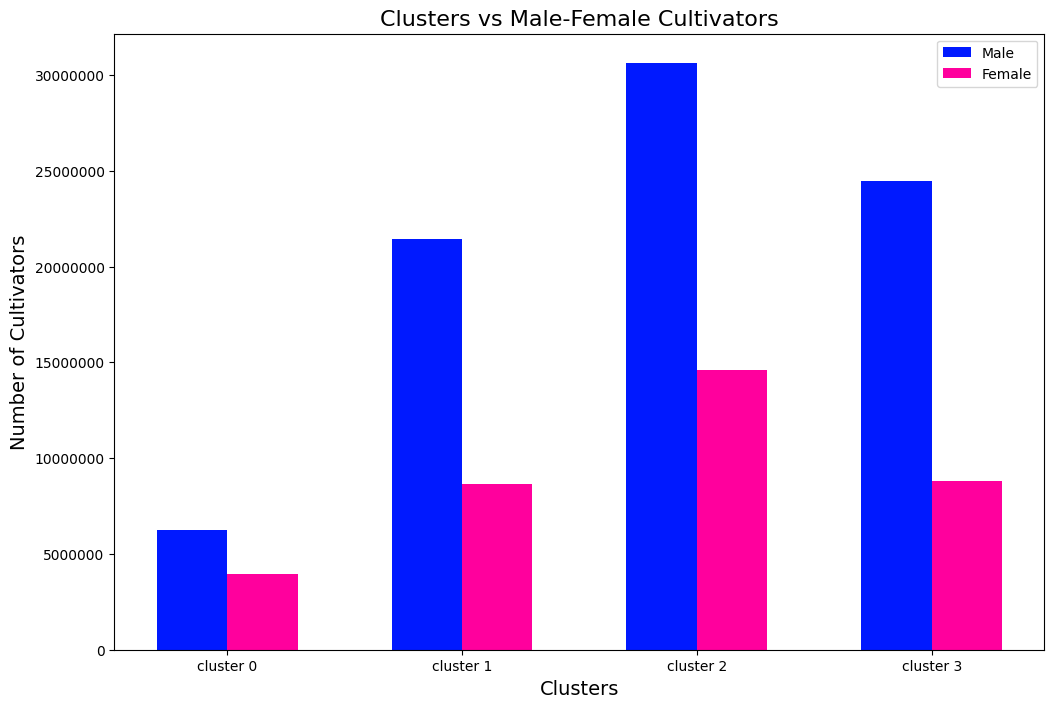

In [6]:
z = np.arange(len(clusters))
indexlist = clusters.index.tolist()

plt.figure(figsize=(12, 8))
plt.bar(z-0.15, grouped['Male Cultivators'], width=0.3, color='#0019ff', label='Male')
plt.bar(z+0.15, grouped['Female Cultivators'], width=0.3, color='#ff009d', label='Female')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Cultivators', fontsize=14)
plt.title('Clusters vs Male-Female Cultivators', fontsize=16) 
plt.xticks(z, [f"cluster {i}" for i in range(0,4)], fontsize=10)
plt.legend()
plt.show()

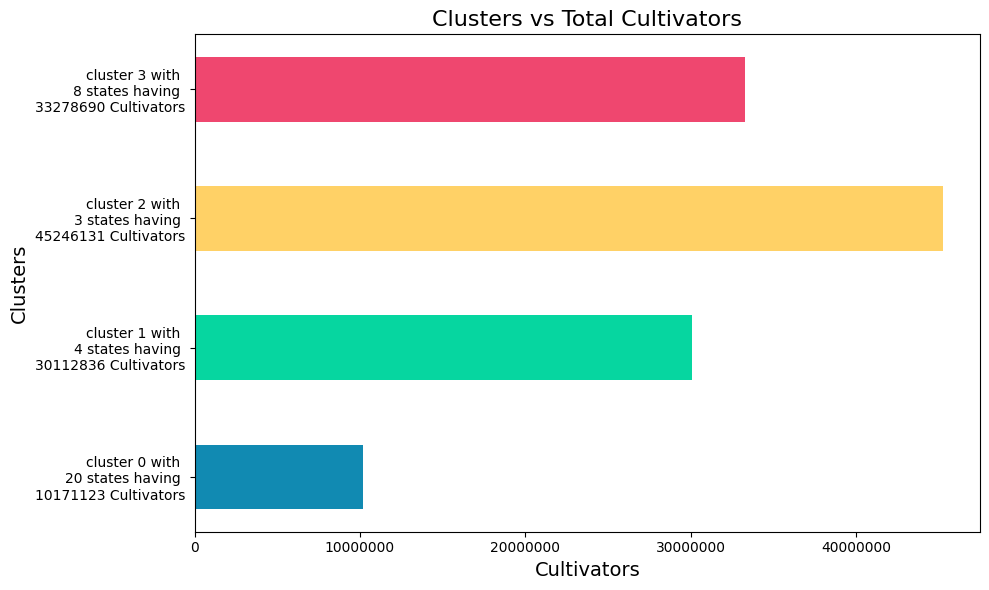

In [7]:
colors = ['#118ab2', '#06d6a0', '#ffd166', '#ef476f']

plt.figure(figsize=(10, 6))
plt.barh([f"cluster {i} with \n{clusters.iloc[i, 0]} states having \n{grouped.iloc[i, 0]} Cultivators" for i in range(0, 4)], grouped['Cultivators'], height=0.5, color=colors)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='x')
plt.xlabel('Cultivators', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.title('Clusters vs Total Cultivators', fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
display("From above graph we can see that cluster 2 has less number of states and maximum number of agricultural workforce")
display("which is easy to target.")
cluster2_index = []
for i in range(len(cultivators)):
    if (cultivators.iloc[i, 3] == 2):
        cluster2_index.append(i)
display("States : ")
for i in range(len(cluster2_index)):
    print(dataframe.iloc[cluster2_index[i], 0], ":", dataframe.iloc[cluster2_index[i], 1], "cultivators")
display("Total number of farmers : ", grouped.iloc[2, 0])

'From above graph we can see that cluster 2 has less number of states and maximum number of agricultural workforce'

'which is easy to target.'

'States : '

Rajasthan : 13618870 cultivators
Uttar Pradesh : 19057888 cultivators
Maharashtra : 12569373 cultivators


'Total number of farmers : '

45246131